# Natural Language Processing: Progetto Portfolio

In questo progetto portfolio si analizzerà il [dataset Yelp da Kaggle](https://www.kaggle.com/c/yelp-recsys-2013) e si cercherà di determinare se una recensione sarà valutata con 1 o con 5 stelle in base al testo della review.

Ogni riga del dataset è una recensione di un business a cura di un determinato utente ed è composto dalle colonne:

* 'stars': numero di stelle (da 1 a 5, più stelle migliore review) assegnate dall'utente al business.
* 'cool': numero di voti "cool" che la recensione ha ricevuto da altri utenti di Yelp. Tutte le review partono da 0 voti "cool" e non c'è un limite. È un rating della recensione, non del business.
* 'funny': analogo a 'cool'.
* 'useful': analogo a 'cool'.
* 'date': data in cui è stata pubblicata la recensione.
* 'business_id': codice identificativo del business.
* 'review_id': analogo a 'business_id'.
* 'user_id': analogo a 'business_id'.
* 'type': categoria a cui appartiene il testo della recensione, banalmente sono tutte 'review'.
* 'text': testo della recensione.

## Importare librerie

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Ottenere i dati

In [3]:
yelp = pd.read_csv('yelp.csv')

In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


Dalla colonna 'text' si crea una nuova colonna 'length' che contiene la lunghezza del testo della recensione.

In [7]:
yelp['length'] = yelp['text'].apply(len)

## EDA

Si studia la distribuzione della lunghezza del testo per le recensioni distinguendo le 5 categorie di stelle disponibili.

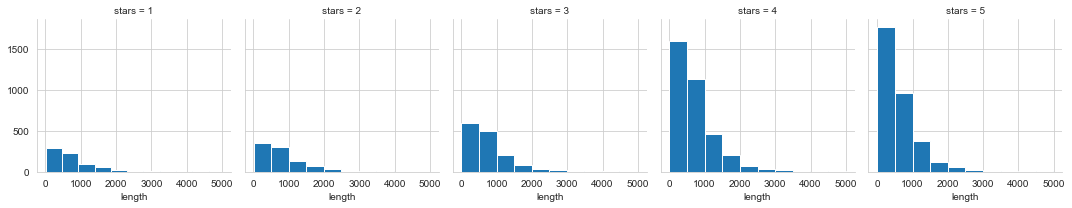

In [8]:
fg = sns.FacetGrid(data=yelp,col='stars')
fg.map(plt.hist,'length')

**Le distribuzioni parrebbero essere molto simili per ciascuna categoria, non considerando il numero assoluto di recensioni per ciascuna valutazione in stelle.**

Si analizzano più dettagliatamente le distribuzioni con un boxplot.

<AxesSubplot:xlabel='stars', ylabel='length'>

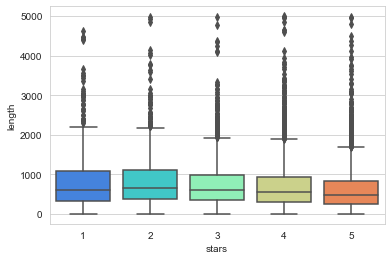

In [9]:
sns.boxplot(data=yelp,x='stars',y='length',palette='rainbow')

**Le distibuzioni sono effettivamente centrate per un numero di caratteri simile nelle 5 categorie, l'unica differenza interessante è la maggiore varianza nelle distribuzioni delle recensioni da 1 e 2 stelle. Non è una feature così importante per la classificazione.**

Si visualizza il numero assoluto di recensioni per ciascuna categoria.

<AxesSubplot:xlabel='stars', ylabel='count'>

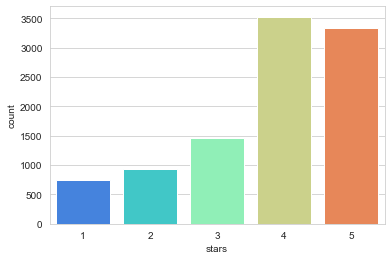

In [10]:
sns.countplot(data=yelp,x='stars',palette='rainbow')

**Come intuito visivamente prima le recensioni da 4 e 5 stelle sono molto di più rispetto alle altre. Il dataset è molto sbilanciato.**

Si indaga la correlazione fra i valori medi delle colonne 'length', 'cool', 'useful' e 'funny' nella determinazione della categoria 'stars'.

In [11]:
yelp.groupby('stars').mean()

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
yelp.groupby('stars').mean().corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


Si visualizzano queste correlazioni con una heatmap.

<AxesSubplot:>

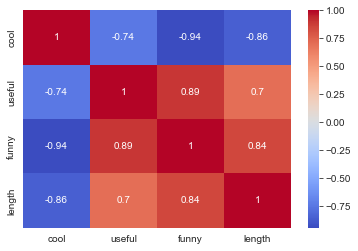

In [13]:
sns.heatmap(yelp.groupby('stars').mean().corr(),cmap='coolwarm',annot=True)

**A quanto pare meno è lunga una recensione e maggiori voti "cool" dovrebbe avere, viceversa con i voti "useful" e "funny".**

## Data Preprocessing

Dato che si vuole determinare il numero di stelle di una recensione dal testo della stessa, bisogna lavorare su quest'ultimo prima di darlo in pasto ad un algoritmo di machine learning, il quale tipicamente richiede delle feature numeriche.

La scelta per questo progetto portfolio è di rendere i testi delle "bag of words" dopo averli ripuliti dai segni di punteggiatura e dalle cosiddette stopwords, cioé quelle parole di una determinata lingua che sono talmente comuni da non dare praticamente nessuna informazione (e.g. in inglese 'i', 'am', 'the', ecc...). A tale scopo si importano le librerie ***string*** e ***ntlk*** che contengono rispettivamente una lista di segni di punteggiatura e di stopwords. Per continuare la normalizzazione del testo si fa anche la lemmatizzazione delle parole.

In [14]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

Si definisce il custom analyzer per ripulire i testi del dataset.

In [15]:
def custom_analyzer(text): # processo di tokenization
    """
    1. si rimuove la punteggiatura
    2. si rimuovono le stopwords
    3. si crea una lista delle parole del testo ripulito
    4. si continua la normalizzazione del testo con la Lemmatizzazione
    """
    # Faccio una list comprehension che contiene il testo scomposto in caratteri,
    # eliminando i segni di punteggiatura (nota: gli spazi e i simboli speciali restano)
    nopunc = [char for char in text if char not in string.punctuation] 
    
    # Unisco i caratteri nel testo originale senza la punteggiatura
    nopunc = ''.join(nopunc)
    
    # Creo una lista delle parole del testo pulito senza le stopwords inglesi
    tokens = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # Uso la Lemmatizzazione sui tokens, prima per i verbi e poi per i nomi
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word, pos = "v") for word in tokens]
    tokens = [lemma.lemmatize(word, pos = "n") for word in tokens]
    return tokens

Per semplicità in questo progetto si terranno solo le recensioni da 1 stella o da 5 stelle, infatti il dataset è molto sbilanciato e un algoritmo non avanzato come questo non riuscirebbe a distinguere decentemente le categorie a basse stelle.

In [16]:
yelp_class = pd.DataFrame(yelp[(yelp['stars'] == 5) | (yelp['stars'] == 1)])

In [17]:
X = yelp_class['text']
y = yelp_class['stars']

Per creare le bag of words si importa CountVectorizer.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer(analyzer=custom_analyzer)

In [20]:
X = cv.fit_transform(X)

Il risultato sarà una matrice sparsa con un livello di sparsity altissimo.

In [21]:
X

<4086x22234 sparse matrix of type '<class 'numpy.int64'>'
	with 215437 stored elements in Compressed Sparse Row format>

In [22]:
sparsity = 100 - (100 * (X.nnz/(X.shape[0]*X.shape[1])))
print(sparsity) 

99.76286026555705


## Training & Testing Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Model Training: Naive Bayes multinomiale

Come algoritmo per questo progetto portfolio si prova un Naive Bayes multinomiale che in generale performa bene per questo compito.

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nb = MultinomialNB()

In [27]:
nb.fit(X_train,y_train)

MultinomialNB()

## Performance del Modello

In [28]:
nb_predictions = nb.predict(X_test)

Si valutano le performance del modello con una confusion matrix e un classification report.

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
print(confusion_matrix(y_test,nb_predictions))
print('\n')
print(classification_report(y_test,nb_predictions))

[[161  67]
 [ 25 973]]


              precision    recall  f1-score   support

           1       0.87      0.71      0.78       228
           5       0.94      0.97      0.95       998

    accuracy                           0.92      1226
   macro avg       0.90      0.84      0.87      1226
weighted avg       0.92      0.92      0.92      1226



Text(0.5, 1.0, 'Confusion Matrix in percentuali')

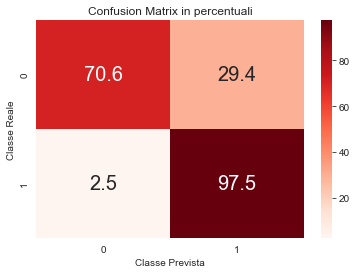

In [31]:
conf_mat = confusion_matrix(y_test,nb_predictions)
conf_mat = 100*(conf_mat.astype('float')/conf_mat.sum(axis=1)[:,np.newaxis])

sns.heatmap(conf_mat,annot=True,cmap='Reds',fmt='.1f',annot_kws={'size':20})
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Reale')
plt.title('Confusion Matrix in percentuali')

**Come ci si poteva aspettare dal dataset il modello performa molto bene nel predire la classe a 5 stelle, meno quella a 1 stella. Analizziamo quanto il modello abbia performato meglio di un "weighted guessing" in questo specifico dataset.**

<AxesSubplot:xlabel='stars', ylabel='count'>

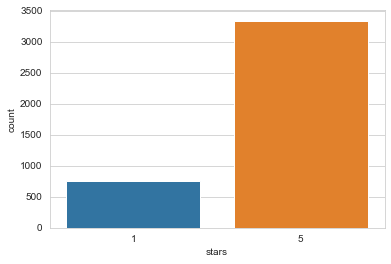

In [32]:
sns.countplot(data=yelp_class,x='stars')

In [33]:
print('Percentuale di 5 stars reviews nel dataset:',round((yelp_class['stars']==5).sum()/len(yelp_class)*100,ndigits=1))
print('Percentuale di 1 stars reviews nel dataset:',round((yelp_class['stars']==1).sum()/len(yelp_class)*100,ndigits=1))

Percentuale di 5 stars reviews nel dataset: 81.7
Percentuale di 1 stars reviews nel dataset: 18.3


**In generale il modello ha performato bene, riuscendo a distinguere nel 70.6% dei casi la classe 1 stella, nonostante questa sia presente nel dataset solo al 18.3%. Inoltre è riuscito a migliorare il potere predittivo anche per la classe a 5 stelle.**

## Model Training: SGDClassifier 

Nonostante il modello sia buono per il compito datogli, si cerca di migliorarlo il più possibile. A questo scopo si utilizza un nuovo algoritmo per la classificazione, ovvero l'SGD (Stochastic Gradient Descent) con un SVM lineare, che è riconosciuto come uno dei migliori algoritmi di classificazione per i testi.

Come si è soliti fare nei compiti riguardanti i testi, non si deve necessariamente ripetere l'iter visto precedentemente ma è possibile creare una **pipeline** di lavoro già presente in scikit-learn.

In [34]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=custom_analyzer)), # testo in tokens
    ('tf_idf', TfidfTransformer()), # aggiungo gli score Tf_Idf che danno un peso ai vector counts delle bag of words
    ('sgd_class', SGDClassifier()) # nuovo classificatore 
])

Dato che la pipeline ricomincia dalla tokenizzazione ho bisogno che i dati in input siano di nuovo testo grezzo. Si rifà il train test split di yelp_class.

In [37]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [38]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function custom_analyzer at 0x7f25c91ecd30>)),
                ('tf_idf', TfidfTransformer()),
                ('sgd_class', SGDClassifier())])

## Performance del Modello

In [39]:
sgd_predictions = pipeline.predict(X_test)

In [40]:
print(confusion_matrix(y_test,sgd_predictions))
print('\n')
print(classification_report(y_test,sgd_predictions))

[[174  54]
 [ 23 975]]


              precision    recall  f1-score   support

           1       0.88      0.76      0.82       228
           5       0.95      0.98      0.96       998

    accuracy                           0.94      1226
   macro avg       0.92      0.87      0.89      1226
weighted avg       0.94      0.94      0.94      1226



Text(0.5, 1.0, 'Confusion Matrix in percentuali')

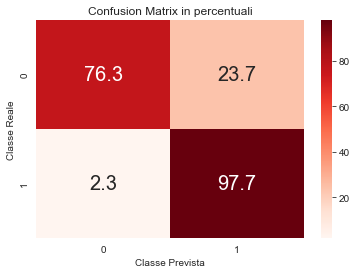

In [41]:
conf_mat = confusion_matrix(y_test,sgd_predictions)
conf_mat = 100*(conf_mat.astype('float')/conf_mat.sum(axis=1)[:,np.newaxis])

sns.heatmap(conf_mat,annot=True,cmap='Reds',fmt='.1f',annot_kws={'size':20})
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Reale')
plt.title('Confusion Matrix in percentuali')

**Il risultato è migliore del precedente, anche se abbiamo aggiunto un peso ai token che prima non c'era (ndr: avrebbe rovinato tutto prima, probabilmente perché gli algoritmi Naive Bayes sono molto suscettibili al bias del dataset). Volendo essere avido potrei ottimizzare i parametri della pipeline con un GridSearch, ma la spesa computazionale diventa troppo esosa rispetto al miglioramento delle performance.**

E qui si conclude il progetto portfolio sul Natural Language Processing (NLP) in cui si sono ripuliti i testi con un semplice tokenizzatore custom che include la lemmatizzazione. Inoltre si è sfruttata una pipeline per provare un altro algoritmo senza ripetere tutto l'iter di lavoro.